<a href="https://colab.research.google.com/github/Aliahmadjangohar/Aliahmadjangohar/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this lab

In [ ]:
#Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117302 sha256=a1fc91f20e84147280ac64375d5b47ee92ea49380a6ac27950cfe01ac3fb1578
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


Let's download and load the dataset and display a few random samples from it:

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 0s 0us/step


Our training set is made up of 28x28 grayscale images of handwritten digits.

Let's visualize what some of these images and their corresponding training labels look like.

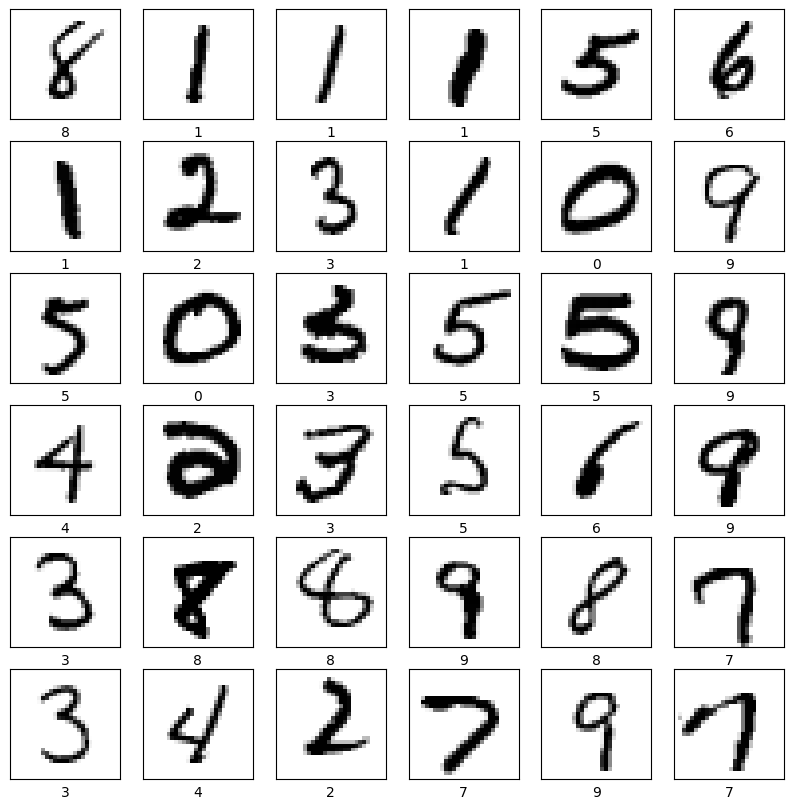

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Before training the model, we need to define a few more settings. These are added during the model's compile step:

Loss function — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction. Optimizer — This defines how the model is updated based on the data it sees and its loss function. Metrics — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified. We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training.

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset and preprocess it (assuming you've already done this)

# Define a function to build the model
def build_fc_model(optimizer, learning_rate):
    fc_model = tf.keras.Sequential([
        # First define a Flatten layer
        tf.keras.layers.Flatten(),

        # Define the activation function for the first fully connected (Dense) layer.
        tf.keras.layers.Dense(128, activation='relu'),

        # Define the second Dense layer to output the classification probabilities.
        tf.keras.layers.Dense(10, activation='softmax')  # Assuming you have 10 classes for classification
    ])

    # Compile the model with the specified optimizer and learning rate
    fc_model.compile(optimizer=optimizer(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return fc_model

# Define a list of optimizers and learning rates to experiment with
optimizers = [tf.keras.optimizers.SGD, tf.keras.optimizers.Adam]
learning_rates = [1e-1, 1e-2, 1e-3]

# Loop through combinations of optimizers and learning rates
for optimizer in optimizers:
    for learning_rate in learning_rates:
        # Build the model with the current optimizer and learning rate
        model = build_fc_model(optimizer, learning_rate)

        # Train the model on your training data (train_images and train_labels)
        model.fit(train_images, train_labels, epochs=5, verbose=0)

        # Evaluate the model on your test data (test_images and test_labels)
        test_loss, test_acc = model.evaluate(test_images, test_labels)

        # Print the results
        print(f"Optimizer: {optimizer.__name__}, Learning Rate: {learning_rate}")
        print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 2s 4ms/step - loss: 0.0866 - accuracy: 0.9727
Optimizer: SGD, Learning Rate: 0.1
Test accuracy: 0.9726999998092651
313/313 [==============================] - 1s 3ms/step - loss: 0.2165 - accuracy: 0.9381
Optimizer: SGD, Learning Rate: 0.01
Test accuracy: 0.9380999803543091
313/313 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.8824
Optimizer: SGD, Learning Rate: 0.001
Test accuracy: 0.8823999762535095
313/313 [==============================] - 1s 2ms/step - loss: 1.4656 - accuracy: 0.5409
Optimizer: Adam, Learning Rate: 0.1
Test accuracy: 0.5408999919891357
313/313 [==============================] - 1s 2ms/step - loss: 0.1725 - accuracy: 0.9650
Optimizer: Adam, Learning Rate: 0.01
Test accuracy: 0.9649999737739563
313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9749
Optimizer: Adam, Learning Rate: 0.001
Test accuracy: 0.9749000072479248


Here's what you can observe from these results:

Learning Rate Effect:  a higher learning rate (0.1) with both SGD and Adam optimizers initially led to faster convergence, resulting in high accuracy. However, a very high learning rate (0.1) with Adam caused the model to perform poorly.

Learning Rate Tuning:  (0.01) generally yielded good results for both optimizers, providing a good balance between training speed and convergence.

Very Low Learning Rate: A very low learning rate (0.001) with both optimizers resulted in slower convergence and lower accuracy, but it still performed reasonably well.

Adam vs. SGD:Adam outperformed SGD with a learning rate of 0.01 and 0.001. However, in this set of results, the performance of SGD with a learning rate of 0.1 improved compared to the previous set but was still not as good as Adam.

Final Recommendations:  a learning rate of 0.01 appears to be a reasonable choice for both optimizers based on these results. However, hyperparameter tuning is an iterative process, and further experimentation may be required to fine-tune the model for your specific task.

It's essential to consider that these results are based on this specific dataset and model architecture. For different datasets and model complexities, the optimal hyperparameter settings may vary. Grid search or other hyperparameter optimization techniques can help find the best combination for your particular problem.